In [64]:
import pandas as pd
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skbio.stats.distance import anosim
from skbio.stats.distance import permanova

In [65]:
df2 = pd.read_csv('otu_table_T2.tsv', sep='\t')
ids2 = list(df2.columns.values)
df2 = df2.T
data2 = df2.values.tolist()
df2

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
589.T2,0.003773,0.011318,0.000086,0.000086,0.005402,0.015090,0.003858,0.007631,0.018091,0.001972,...,0.007202,0.000086,0.003172,0.000171,0.000514,0.002829,0.000000,0.001458,0.000514,0.000343
586.T2,0.006094,0.021851,0.000087,0.000261,0.001219,0.052755,0.016802,0.045356,0.055454,0.000958,...,0.007922,0.000435,0.008444,0.000174,0.000522,0.000609,0.000000,0.004005,0.003221,0.012623
602.T2,0.003982,0.017283,0.000335,0.000155,0.005568,0.036822,0.004936,0.011574,0.035868,0.001224,...,0.000812,0.000129,0.003892,0.000064,0.000116,0.000838,0.000000,0.002990,0.001572,0.006483
596.T2,0.002556,0.006010,0.000276,0.000345,0.002625,0.035090,0.004973,0.005388,0.032949,0.000553,...,0.001174,0.000000,0.002625,0.000069,0.000207,0.003247,0.000138,0.000138,0.000760,0.000000
603.T2,0.005188,0.012188,0.000141,0.000153,0.002494,0.015058,0.003812,0.013023,0.018634,0.001423,...,0.001071,0.000012,0.004682,0.000071,0.000294,0.001447,0.000000,0.000247,0.003647,0.032422
583.T2,0.002666,0.013593,0.000219,0.000219,0.012195,0.057870,0.004852,0.009747,0.068753,0.000830,...,0.003671,0.000175,0.004895,0.000044,0.000131,0.000612,0.000087,0.000393,0.001268,0.001268
601.T2,0.005085,0.007655,0.000082,0.000150,0.001818,0.060789,0.012043,0.017976,0.042868,0.000834,...,0.006370,0.000014,0.002966,0.000123,0.000752,0.002830,0.000000,0.005523,0.003240,0.003595
592.T2,0.003314,0.004564,0.000000,0.000163,0.001684,0.044825,0.007661,0.008150,0.032654,0.005053,...,0.022766,0.000000,0.005705,0.000109,0.000272,0.002717,0.000163,0.000000,0.004618,0.000380
576.T2,0.003059,0.000756,0.000033,0.000329,0.027329,0.126188,0.012037,0.022232,0.048245,0.005065,...,0.002171,0.000066,0.007498,0.000296,0.000526,0.002368,0.000000,0.011083,0.000197,0.000362
600.T2,0.004382,0.012687,0.000631,0.000172,0.001454,0.029814,0.011558,0.012993,0.030522,0.000402,...,0.003196,0.000038,0.008363,0.000057,0.000383,0.001186,0.000057,0.000421,0.002488,0.022849


In [48]:
bc_dm2 = beta_diversity("braycurtis", data2, ids2)

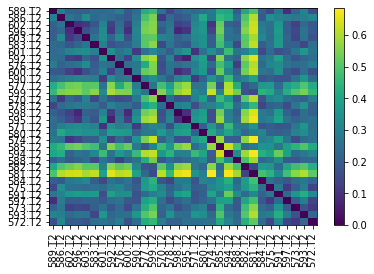

In [49]:
bc_dm2

In [50]:
bc_pcoa2 = pcoa(bc_dm2)

/home/basilin/miniconda3/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.03525635989807387 and the largest is 1.1662217726289092.
  RuntimeWarning


In [51]:
mapping = pd.read_csv('mapping_file_cohousing2018.tsv', sep="\t", index_col=0)
mapping

,Week,Category
#SampleID,,
570.T0,0,Placebo
570.T1,1,Placebo
570.T2,2,Placebo
570.T3,3,Placebo
570.T4,4,Placebo
570.T5,5,Placebo
571.T0,0,Placebo
571.T1,1,Placebo
571.T2,2,Placebo


In [52]:
mapping_time2 = mapping[mapping.Week == 2]
mapping_time5 = mapping[mapping.Week == 5]

In [53]:
mapping_time2 = mapping_time2.drop("Week", axis=1)
mapping_time5 = mapping_time5.drop("Week", axis=1)

## Time 2 Pcoa, permanova and adonis

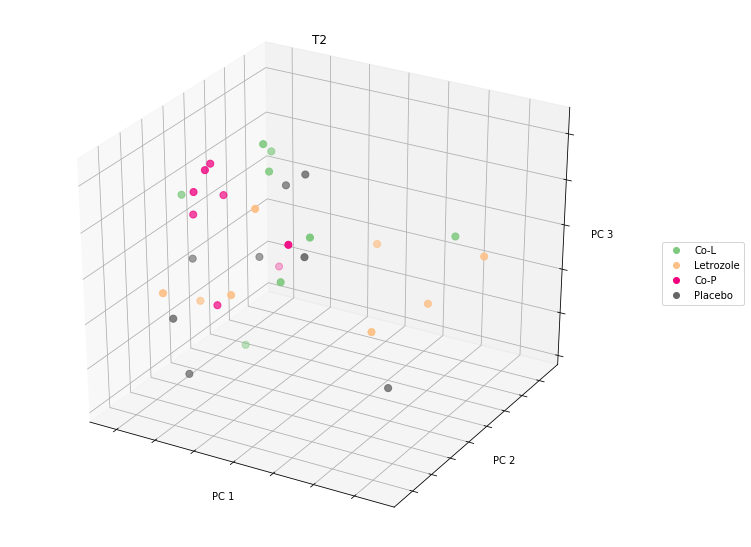

In [54]:
ax = bc_pcoa2.plot(mapping_time2, 'Category', axis_labels=('PC 1', 'PC 2', 'PC 3'), title='T2', cmap='Accent', s=50)
ax.set_size_inches(12, 8)

In [55]:
results2_an = anosim(bc_dm2, mapping_time2, column='Category', permutations=999)
results2_an

method name                  ANOSIM
test statistic name               R
sample size                      32
number of groups                  4
test statistic            0.0647321
p-value                       0.101
number of permutations          999
Name: ANOSIM results, dtype: object

In [56]:
results2_p = permanova(bc_dm2, mapping_time2, column='Category', permutations=999)
results2_p

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      32
number of groups                  4
test statistic              2.50083
p-value                       0.035
number of permutations          999
Name: PERMANOVA results, dtype: object

## Time 5

In [57]:
df5 = pd.read_csv('otu_table_T5.tsv', sep='\t')
ids5 = list(df5.columns.values)
df5 = df5.T
data5 = df5.values.tolist()

In [58]:
bc_dm5 = beta_diversity("braycurtis", data5, ids5)

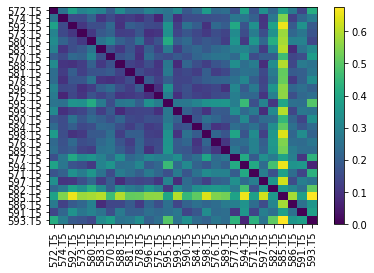

In [59]:
bc_dm5

In [60]:
bc_pcoa5 = pcoa(bc_dm5)

/home/basilin/miniconda3/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.02382160598069578 and the largest is 0.6008015703692672.
  RuntimeWarning


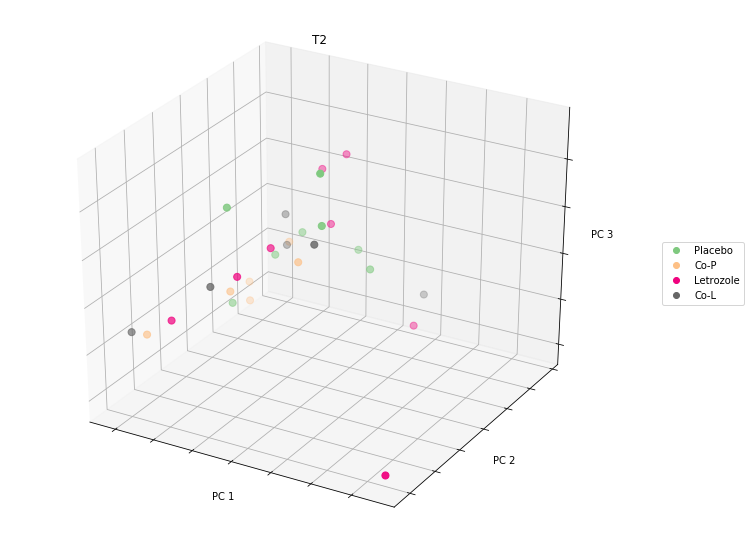

In [61]:
ax5 = bc_pcoa5.plot(mapping_time5, 'Category', axis_labels=('PC 1', 'PC 2', 'PC 3'), title='T2', cmap='Accent', s=50)
ax5.set_size_inches(12, 8)

In [62]:
results5_an = anosim(bc_dm5, mapping_time5, column='Category', permutations=999)
results5_an

method name                  ANOSIM
test statistic name               R
sample size                      28
number of groups                  4
test statistic           -0.0203887
p-value                       0.594
number of permutations          999
Name: ANOSIM results, dtype: object

In [63]:
results5_p = permanova(bc_dm5, mapping_time5, column='Category', permutations=999)
results5_p

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      28
number of groups                  4
test statistic              1.18629
p-value                       0.296
number of permutations          999
Name: PERMANOVA results, dtype: object